In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
y=df.Churn_Yes

### Task 1 : Checking Class Balance: Dependent Variable Bar Graph Analysis

<AxesSubplot:>

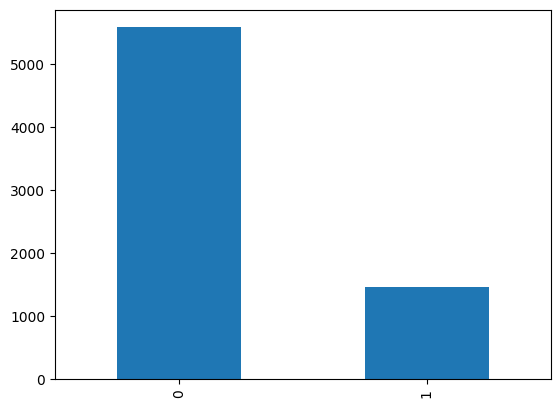

In [5]:
y.value_counts().plot.bar()

### Task 2 : Handling Class Imbalance with SMOTE

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=100)
x_smote, y_smote = smote.fit_resample(df.iloc[:, 0:-1], df['Churn_Yes'])
print('Original dataset shape:', len(df))
print('Resampled dataset shape:', len(y_smote))

Original dataset shape: 7043
Resampled dataset shape: 11164


### Task 3 : Standardization of Customer Churn Independent Variables using Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_smote)

### Task 4 : Splitting Dataset into Training and Testing Subsets

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y_smote, train_size=0.7, test_size=0.3, random_state=100)

### Task 5 : Training Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state = 100)
logreg_model.fit(xtrain, ytrain)
ypred_logreg = logreg_model.predict(xtest)

### Training Support Vector Machine Model

In [12]:
from sklearn.svm import SVC
model4 = SVC(kernel="rbf", random_state=100)
model4.fit(xtrain, ytrain)
ypred_svm = model4.predict(xtest)

### Training the Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=50)
dt_model.fit(xtrain, ytrain)
ypred_dt = dt_model.predict(xtest)

### Training the Xgboost Model

In [14]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 2, random_state=100)
xgb_model.fit(xtrain, ytrain)
ypred_xgb = xgb_model.predict(xtest)

### Evaluation Performance of Each Model on Test Dataset

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cm1 = confusion_matrix(ytest, ypred_logreg)
cm1

array([[1357,  317],
       [ 233, 1443]])

In [17]:
cm2 = confusion_matrix(ytest, ypred_svm)
cm2

array([[1379,  295],
       [ 233, 1443]])

In [18]:
cm3 = confusion_matrix(ytest, ypred_dt)
cm3

array([[1351,  323],
       [ 289, 1387]])

In [19]:
cm4 = confusion_matrix(ytest, ypred_xgb)
cm4

array([[1372,  302],
       [ 213, 1463]])

### Evaluate Each Model on Test Dataset Using Accuracy Score

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
ac1 = accuracy_score(ytest, ypred_logreg)
ac1

0.835820895522388

In [23]:
ac2 = accuracy_score(ytest, ypred_svm)
ac2

0.8423880597014926

In [24]:
ac3 = accuracy_score(ytest, ypred_dt)
ac3

0.8173134328358209

In [25]:
ac4 = accuracy_score(ytest, ypred_xgb)
ac4

0.8462686567164179

### Hyperparameter Tuning for Xgboost Model using Grid Search CV

In [26]:
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
param_grid = {
'learning_rate': [0.1, 0.01],
'max_depth': [5, 7],
'n_estimators': [200, 300,],
'subsample': [0.8, 0.9]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}


In [27]:
xgb_model_hp = XGBClassifier(learning_rate=0.1, max_depth= 7, n_estimators =300, subsample=0.9,random_state = 100)
xgb_model_hp.fit(xtrain, ytrain)

ypred_xgb_hp=xgb_model_hp.predict(xtest)
y_pred_proba_xgb_hp = xgb_model_hp.predict_proba(xtest)[:, 1]

### Evaluate the Performance of the Best Xgboost Model

In [28]:
from sklearn.metrics import roc_curve,roc_auc_score

In [29]:
cm5=confusion_matrix(ytest ,ypred_xgb_hp)
cm5

array([[1440,  234],
       [ 192, 1484]])

In [30]:
print(grid_search.best_score_)

0.8580755515469363


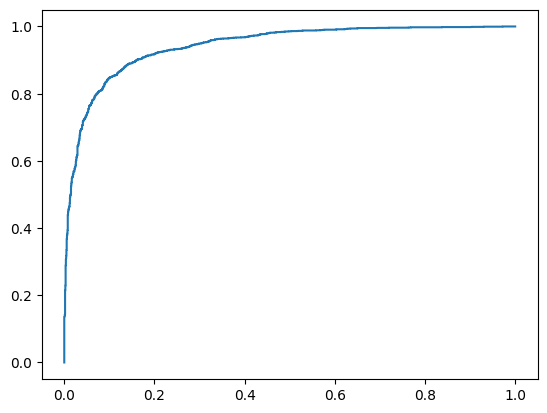

In [31]:
xgb_auc = roc_auc_score(ytest, y_pred_proba_xgb_hp)
xgb_fpr, xgb_tpr, _ = roc_curve(ytest, y_pred_proba_xgb_hp)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = %.2f)' % xgb_auc)